In [1]:
import numpy as np

In [52]:
import numpy as np
import matplotlib.pyplot as plt


class Regresion_Lineal:
    
    def __init__(self):
        pass        

    def fit(self,datos):
        self.datos = datos.copy()
        self.n = datos.shape[1]
        x_prom = np.mean(datos,axis=1)[0]
        y_prom = np.mean(datos,axis=1)[1]
        sum_prod = np.sum(datos[0,:]*datos[1,:])
        sum_x_sqrs = np.sum(datos[0,:]*datos[0,:])
        sum_x = np.sum(datos[0,:])
        sum_y = np.sum(datos[1,:])
        self.a_1 = (self.n*sum_prod - sum_x*sum_y)/(self.n*sum_x_sqrs - sum_x**2)
        self.a_0 = y_prom - self.a_1*x_prom
        return self.a_0,self.a_1
    
    def line(self,x):
        return self.a_0 + self.a_1*x

    def plot(self):
        xmin, xmax = np.min(self.datos[0,:]), np.max(self.datos[0,:])
        xaxis = np.linspace(xmin-1,xmax+1,num=50)
        plt.figure(dpi=100)
        plt.scatter(self.datos[0,:],self.datos[1,:],color='black')
        plt.plot(xaxis,[self.line(x) for x in xaxis],color='red')
        plt.show()

    def metrics(self):
        S_t = np.sum((self.datos[1,:]-np.mean(self.datos,axis=1)[1])**2)
        S_r = np.sum((self.datos[1,:]-self.line(self.datos[0,:]))**2)
        s_y = np.sqrt(S_t/(self.n-1))
        s_yx = np.sqrt(S_r/(self.n-2))
        r2 = (S_t-S_r)/S_t
        print(f"Error respecto al promedio: {S_t}")
        print(f"Error cuadrático: {S_r}")
        print(f"S_r<S_t : {S_r<S_t}")
        print(f"Desviación estandar de los datos y_i: {s_y}")
        print(f"Error estandar de la estimación: {s_yx}")
        print(f"S_r<S_t : {s_yx<s_y}")
        print(f"Coeficiente de determinación: {r2}")




4.851535380507342 0.35246995994659547


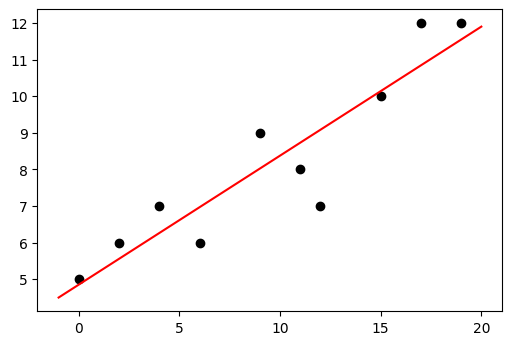

Error respecto al promedio: 55.599999999999994
Error cuadrático: 9.073965287049402
S_r<S_t : True
Desviación estandar de los datos y_i: 2.485513584307633
Error estandar de la estimación: 1.065009699900041
S_r<S_t : True
Coeficiente de determinación: 0.836799185484723


In [53]:
datos = np.array([[0,2,4,6,9,11,12,15,17,19],[5,6,7,6,9,8,7,10,12,12]])

lr = Regresion_Lineal()
a_0, a_1 = lr.fit(datos)
print(a_0,a_1)

lr.plot()
lr.metrics()


Datos:
[[-4.5        -3.5        -2.5        -1.5        -0.5         0.5
   1.5         2.5         3.5         4.5       ]
 [21.23447243 13.32860952  6.2287768   3.03048045  1.13253629  0.84222833
   3.7398144   6.59667906 12.97450679 21.69424047]]


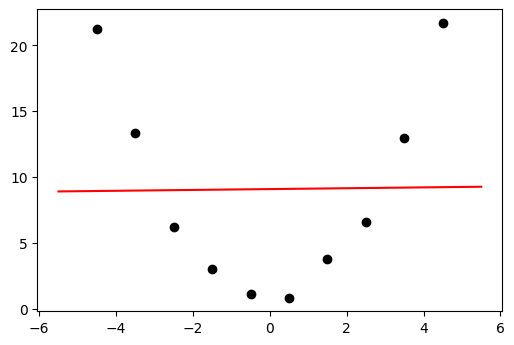

Error respecto al promedio: 550.5018151328268
Error cuadrático: 550.4155207449319
S_r<S_t : True
Desviación estandar de los datos y_i: 7.820925031483927
Error estandar de la estimación: 8.294693490004105
S_r<S_t : False
Coeficiente de determinación: 0.00015675586441812918


In [55]:
noise = np.random.normal(loc=0,scale=0.5,size=10)

xs = np.array(list(range(10)))-4.5
ys = np.array([1+x**2  for x in xs]) + noise
datos = np.vstack((xs,ys))
print(f"Datos:\n{datos}")

lr = Regresion_Lineal()
lr.fit(datos)
lr.plot()
lr.metrics()
